# Explore here

In [13]:
# Your code here
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [2]:
# Your code here
import pandas as pd

dataset = pd.read_csv('../data/raw/Renewable.csv')
dataset

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


#### Paso 2. Exploración y limpieza superficial

##### 1. Dimensiones del problema

In [3]:
dataset.shape

(196776, 17)

The shape attribute in Python is used to get the dimensions of an array or DataFrame. In this case, the dataset has 196,776 rows and 17 columns.

##### 2. Valores nulos / no nulos

In [7]:
dataset.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [8]:
print("From Time : ",dataset['Time'].min())
print("To Time   : ",dataset['Time'].max())

From Time :  2017-01-01 00:00:00
To Time   :  2022-08-31 17:45:00


In [4]:
# Obtener los nombres de las columnas
column_names = dataset.columns

# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
for column_name in column_names:
    print(column_name)

# Imprimir el contenido del conjunto de datos línea por línea
# print("\nContenido del conjunto de datos:")
# for index, row in dataset.iterrows():
    # print(row)

Nombres de las columnas:
Time
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
isSun
sunlightTime
dayLength
SunlightTime/daylength
weather_type
hour
month


In [11]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset.head(20)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
5,2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
6,2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
7,2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
8,2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1
9,2017-01-01 02:15:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1


In [12]:
dataset =dataset[dataset['Energy delta[Wh]'] != 0]
dataset.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
32,2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,1,60,450,0.13,4,8,1
33,2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,1,75,450,0.17,4,8,1
34,2017-01-01 08:30:00,44,2.8,3.5,1016,99,6.0,0.0,0.0,98,1,90,450,0.20,4,8,1
35,2017-01-01 08:45:00,61,3.1,3.5,1016,99,6.0,0.0,0.0,98,1,105,450,0.23,4,8,1
36,2017-01-01 09:00:00,65,3.5,3.6,1016,97,6.2,0.0,0.0,100,1,120,450,0.27,4,9,1


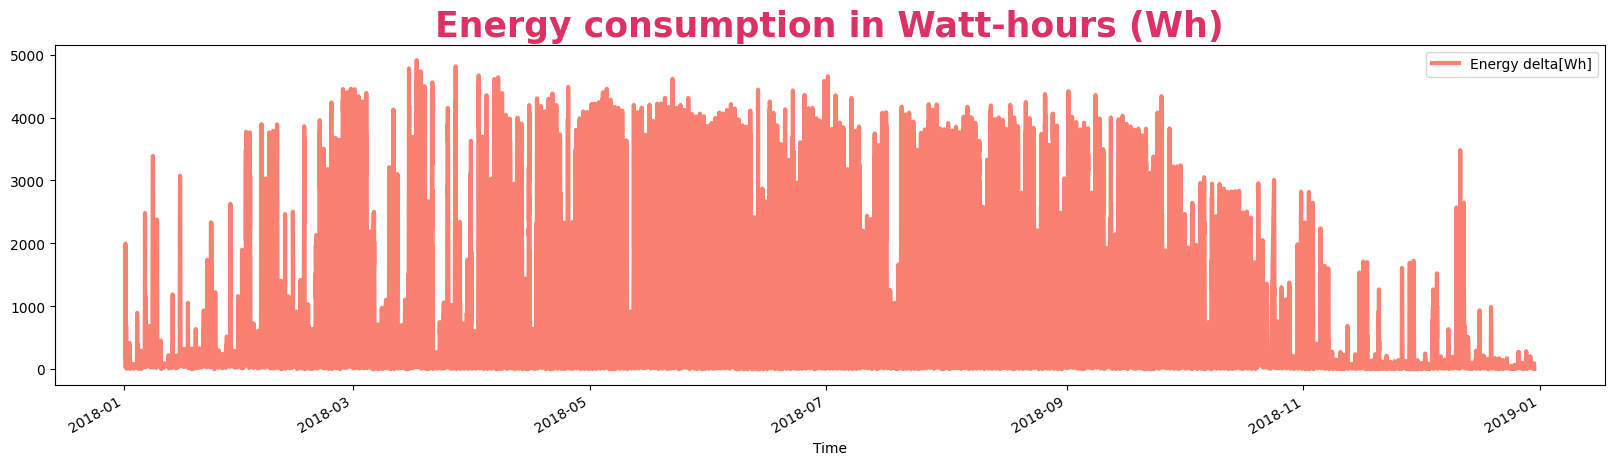

In [15]:
dataset1 = dataset[['Time','Energy delta[Wh]']].copy('Deep')
dataset1 = dataset1.set_index('Time')
dataset_2018 =dataset1[(dataset1.index >= '2018-01-01') & (dataset1.index < '2018-12-31')]
dataset_2018.plot(figsize=(20,5), lw=3,color = '#FA8072')
plt.title('Energy consumption in Watt-hours (Wh)', weight='bold', fontsize=25,color = '#DE3163'); 

In [6]:
# Obtener el contenido de la columna "weather_type"
weather_type_column = dataset['weather_type']

# Imprimir los valores únicos en la columna "weather_type"
unique_weather_types = weather_type_column.unique()
print("Valores únicos en la columna 'weather_type':")
for weather_type in unique_weather_types:
    print(weather_type)

Valores únicos en la columna 'weather_type':
4
5
3
2
1
